# Data Science Assignment: eCommerce Transactions Dataset 
## Overview: 

You are provided with an eCommerce Transactions dataset consisting of three files: 
Customers.csv, Products.csv, and Transactions.csv. Your task is to perform 
exploratory data analysis (EDA), build predictive models, and derive actionable insights. This 
assignment will test your data analysis, machine learning, and business insight generation skills.

In [59]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Customer.csv

### Region wise Customer Segmentation


In [60]:
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


<Axes: ylabel='count'>

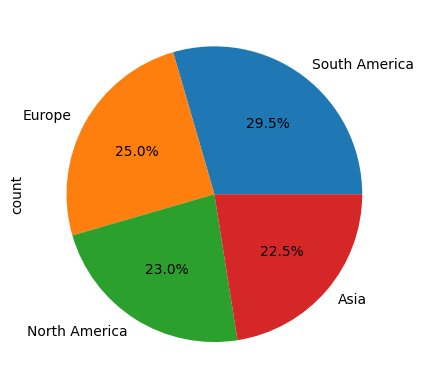

In [61]:
# create a pie chart for region column
df['Region'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Distribution of Sign up Dates


In [62]:
df['SignupDate'].describe()

count            200
unique           179
top       2024-11-11
freq               3
Name: SignupDate, dtype: object

In [63]:
# convert each row to datetime format
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df['SignupDate'].describe()


count                    200
mean     2023-07-19 08:31:12
min      2022-01-22 00:00:00
25%      2022-09-26 12:00:00
50%      2023-08-31 12:00:00
75%      2024-04-12 12:00:00
max      2024-12-28 00:00:00
Name: SignupDate, dtype: object

<Axes: ylabel='count'>

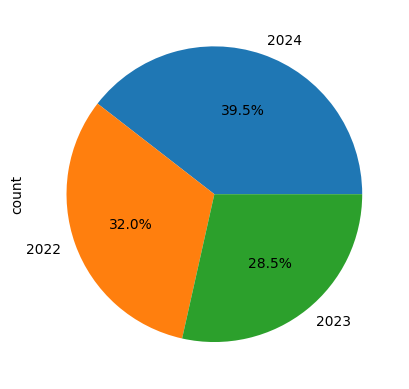

In [64]:
# create a year wise pie chart
df['SignupDate'].dt.year.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [65]:

# Extract year and month from the date_column
df['year'] = df['SignupDate'].dt.year
df['month'] = df['SignupDate'].dt.month

# Create a pivot table
pivot_table = df.pivot_table(
    index='month',
    columns='year',
    values='SignupDate',
    aggfunc='count'
).fillna(0).astype(int)

# Print the pivot table
print(pivot_table)


year   2022  2023  2024
month                  
1         1     5     9
2         7     6     8
3         8     8     4
4         8     6    10
5         8     3     6
6         5     3     4
7         4     3     6
8         4     2     4
9         6     4    11
10        3     7     5
11        3     5    11
12        7     5     1


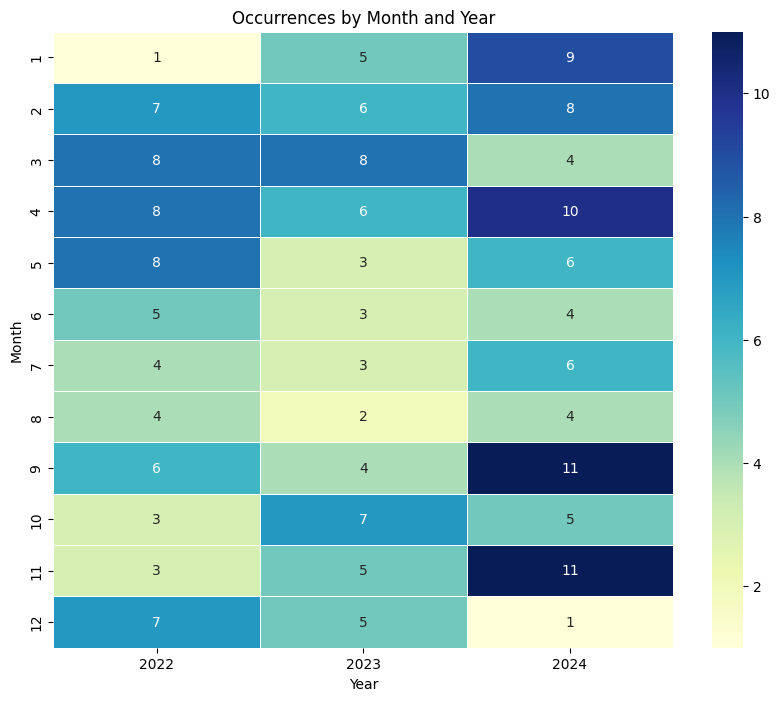

In [66]:
# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Occurrences by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

### Region Specific Sign-up Distribution

In [67]:
# create a pivot table for each region present the minimum signup date, max SignupDate and 90% of signup date
pivot_table = df.pivot_table(
    index='Region',
    values=['SignupDate'],
    aggfunc={'SignupDate': ['min', 'max', lambda x: np.percentile(x, 50)]}
)

pivot_table

SignupDate                      
                       <lambda_0>        max        min
Region                                                 
Asia          2023-10-11 00:00:00 2024-11-13 2022-02-13
Europe        2023-05-16 12:00:00 2024-12-28 2022-02-13
North America 2024-01-29 00:00:00 2024-11-22 2022-02-02
South America 2023-03-11 00:00:00 2024-11-22 2022-01-22

In [68]:

# Group by Region and count signups
signup_counts = df.groupby('Region').size().reset_index(name='SignupCount')

# Print the signup counts
print(signup_counts)


          Region  SignupCount
0           Asia           45
1         Europe           50
2  North America           46
3  South America           59


In [69]:
# Calculate the number of days in the dataset
time_frame_days = (df['SignupDate'].max() - df['SignupDate'].min()).days + 1

# Calculate the signup rate per region (per day)
signup_counts['SignupRatePerDay'] = signup_counts['SignupCount'] / time_frame_days

# Print the signup rates
signup_counts

,Region,SignupCount,SignupRatePerDay
0,Asia,45,0.041978
1,Europe,50,0.046642
2,North America,46,0.042910
3,South America,59,0.055037




## Insight 1
### Customer Distribution
The percentage of customers is nearly uniform across regions, except for South America, which boasts the highest share at 29%.

### Signup Rate
South America leads with the highest daily signup rate, while Asia trails with the lowest.

**Recommendation**
* Diversify Focus: To boost revenue, allocate more resources and attention to regions other than South America.

## Insight 2
### Seasonal Trends
Signups consistently peak during the first and last three months of each year.

**Recommendation**
* Strategic Campaigning: Launch targeted ad campaigns in the middle months of the year to drive sales and engagement during the typically slower periods.

# Products.csv

In [71]:
prod = pd.read_csv('Products.csv')
prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [74]:
# create a pivot table for each category provide total products, max price, min price and median price
pivot_table = prod.pivot_table(
    index='Category',
    values=['Price'],
    aggfunc={'Price': ['count', 'max', 'min', lambda x: np.percentile(x, 50)]}
)

pivot_table


Price                     
            <lambda_0> count     max    min
Category                                   
Books           337.94    26  497.76  33.59
Clothing        303.50    25  481.78  18.82
Electronics     282.72    26  459.86  16.08
Home Decor      235.58    23  454.53  41.18

## Insight 3

**SKU Categories:** The SKUs are divided into four categories: Books, Clothing, Electronics, and Home Decor. Each category contains approximately 23 or more distinct SKUs.

**Price Comparison:** SKUs in the Books category are significantly more expensive compared to other categories. The median price of books is 338, which is just 150 less than the maximum price, highlighting their higher cost.

# Transactions.csv

In [75]:
trans = pd.read_csv('Transactions.csv')
trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### Customer Specific transactions

In [84]:
# create a pivot table showcasing for each customer, number of trnasactions performed, total value of the transaction, max transaction date and min transaction amount and min transaction amount and sort by count
pivot_table = trans.pivot_table(
    index='CustomerID',
    values=['TotalValue'],
    aggfunc={'TotalValue': ['count', 'max', 'min','sum']}
    
)

pivot_table.sort_values(('TotalValue', 'sum'),ascending=False)


TotalValue                           
                count      max     min       sum
CustomerID                                      
C0141              10  1665.60  284.62  10673.87
C0054               8  1445.34   53.98   8040.39
C0065              10  1954.52  167.97   7663.70
C0156              11  1750.60  157.62   7634.45
C0082               7  1991.04  265.28   7572.91
...               ...      ...     ...       ...
C0014               1   318.66  318.66    318.66
C0151               1   223.96  223.96    223.96
C0097               1   137.54  137.54    137.54
C0033               1   132.64  132.64    132.64
C0060               1    82.36   82.36     82.36

[199 rows x 4 columns]

In [92]:
trans.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [93]:
# for every customer ID provide the sum of the total Value
pivot_table = trans.pivot_table(
    index='CustomerID',
    values=['TotalValue'],
    aggfunc={'TotalValue': ['sum']}
)
pivot_table

,TotalValue
,sum
CustomerID,
C0001,3354.52
C0002,1862.74
C0003,2725.38
C0004,5354.88
C0005,2034.24
...,...
C0196,4982.88
C0197,1928.65


<Axes: >

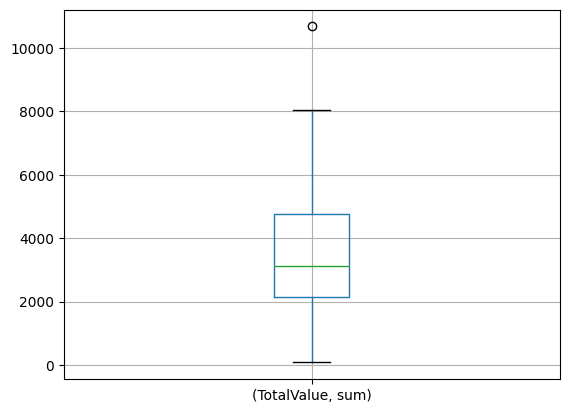

In [94]:
# perform box plot on the pivot table
pivot_table.boxplot()

### Year wise and month wise transaction volume

In [97]:
tv = trans[['TransactionDate','TotalValue']].copy()
tv

,TransactionDate,TotalValue
0,2024-08-25 12:38:23,300.68
1,2024-05-27 22:23:54,300.68
2,2024-04-25 07:38:55,300.68
3,2024-03-26 22:55:37,601.36
4,2024-03-21 15:10:10,902.04
...,...,...
995,2024-10-24 08:30:27,459.86
996,2024-06-04 02:15:24,1379.58
997,2024-04-05 13:05:32,1839.44
998,2024-09-29 10:16:02,919.72


In [98]:
tv['Year']= pd.DatetimeIndex(tv['TransactionDate']).year
tv['Month'] = pd.DatetimeIndex(tv['TransactionDate']).month
tv.head()

,TransactionDate,TotalValue,Year,Month
0,2024-08-25 12:38:23,300.68,2024,8
1,2024-05-27 22:23:54,300.68,2024,5
2,2024-04-25 07:38:55,300.68,2024,4
3,2024-03-26 22:55:37,601.36,2024,3
4,2024-03-21 15:10:10,902.04,2024,3


In [100]:
# for each year provide the sum, count, min and max value
pivot_table = tv.pivot_table(
    index='Year',
    values=['TotalValue'],
    aggfunc={'TotalValue': ['sum', 'count', 'max', 'min']}
)
pivot_table

TotalValue                            
          count      max     min        sum
Year                                       
2023          4  1585.36  313.92    3769.52
2024        996  1991.04   16.08  686226.04

### Product Category Wise Transactions

In [107]:
pv = trans[['ProductID','TotalValue']].copy()
pv.head()

,ProductID,TotalValue
0,P067,300.68
1,P067,300.68
2,P067,300.68
3,P067,601.36
4,P067,902.04


In [108]:
# join pv and product's such that category column is visible
pv = pv.merge(prod, how='left', on='ProductID')
pv= pv[['ProductID','ProductName','Category','TotalValue']]
pv

,ProductID,ProductName,Category,TotalValue
0,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,P067,ComfortLiving Bluetooth Speaker,Electronics,601.36
4,P067,ComfortLiving Bluetooth Speaker,Electronics,902.04
...,...,...,...,...
995,P037,SoundWave Smartwatch,Electronics,459.86
996,P037,SoundWave Smartwatch,Electronics,1379.58
997,P037,SoundWave Smartwatch,Electronics,1839.44
998,P037,SoundWave Smartwatch,Electronics,919.72


In [112]:
# create a pivot table for each product provide total value, count, max value and min value
pivot_table = pv.pivot_table(
    index='ProductName',
    values=['TotalValue'],
    aggfunc={'TotalValue': ['sum', 'count', 'max', 'min']}
)
pivot_table.sort_values(('TotalValue', 'sum'),ascending=False)

TotalValue                           
                                 count      max     min       sum
ProductName                                                      
ActiveWear Smartwatch               40  1822.88  265.51  39096.97
SoundWave Headphones                38  1229.88  196.40  25211.64
SoundWave Novel                     20  1762.80  404.40  24507.90
ActiveWear Jacket                   26  1585.36   78.78  22712.56
ActiveWear Rug                      29  1669.48  121.32  22314.43
...                                ...      ...     ...       ...
ComfortLiving Desk Lamp             10   260.64   65.16   1694.16
SoundWave Bluetooth Speaker          7   257.52   64.38   1223.22
ComfortLiving Rug                    8   223.96   55.99   1063.81
ActiveWear T-Shirt                  10   122.36   30.59    795.34
ComfortLiving Laptop                10   107.96   26.99    647.76

[66 rows x 4 columns]

In [113]:
pivot_table.sort_values(('TotalValue', 'count'),ascending=False)

TotalValue                           
                                 count      max     min       sum
ProductName                                                      
ActiveWear Smartwatch               40  1822.88  265.51  39096.97
SoundWave Headphones                38  1229.88  196.40  25211.64
BookWorld Biography                 30  1665.40  100.81  15080.21
SoundWave Cookbook                  29  1680.60   57.30  15102.72
ActiveWear Rug                      29  1669.48  121.32  22314.43
...                                ...      ...     ...       ...
BookWorld Rug                        7   382.76   95.69   1722.42
BookWorld Cookware Set               7   909.04  227.26   4317.94
SoundWave Bluetooth Speaker          7   257.52   64.38   1223.22
HomeSense Bluetooth Speaker          7   883.64  441.82   5080.93
SoundWave Jacket                     5  1419.24  709.62   5676.96

[66 rows x 4 columns]

In [116]:
pivot_table = pv.pivot_table(
    index='Category',
    values=['TotalValue'],
    aggfunc={'TotalValue': ['sum', 'count', 'max', 'min']}
)
pivot_table.sort_values(('TotalValue', 'sum'),ascending=False)

TotalValue                           
                 count      max    min        sum
Category                                         
Books              270  1991.04  33.59  192147.47
Electronics        254  1839.44  16.08  180783.50
Clothing           228  1927.12  30.59  166170.66
Home Decor         248  1818.12  41.18  150893.93

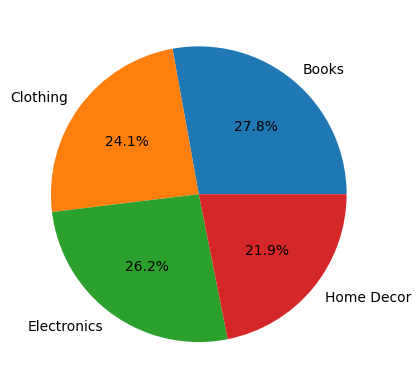

In [117]:
# create a pie chart for each category and percentage of transaction volume using matplotlib
plt.pie(pivot_table['TotalValue']['sum'],labels=pivot_table.index,autopct='%1.1f%%')
plt.show()



## Insights

- **High-Value Customers**: 25% of customers have made purchases exceeding $5000.
- **2024 Transactions**: An overwhelming 99% of transactions occurred in the year 2024.
- **Top Contributors**: The ActiveWear Smartwatch contributed the most to transaction volume, while the ComfortLiving Laptop contributed the least.
- **Least Popular Product**: The SoundWave Jacket is the least popular product in the catalog.
- **Revenue Distribution**: Books are the best-selling SKUs, contributing nearly 28% to the total revenue, while Home Decor has the lowest contribution.

